[[0 3 1]]
[array([0, 1, 2, 3])]


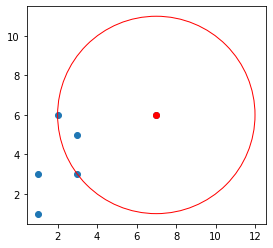

In [43]:
import numpy as np
points = np.array([
    [7,6],
    [2,6],
    [3,3],
    [3,5],
    [1,3],
    [1,1]
])
y = np.array([1,1])
distance = lambda v1,v2,n:np.linalg.norm(v1-v2,ord=n)

from collections import namedtuple
from pprint import pformat

class Node(namedtuple('Node', 'location left_child right_child')):
    def __repr__(self):
        return pformat(tuple(self))

def kd_tree(point_list, depth=0):
    try:
        # 假设所有点都具有相同的维度
        k = len(point_list[0])
    # 如果不是point_list返回None
    except IndexError as e:
        return None
    # 根据深度选择轴，以便轴循环所有有效值
    axis = depth % k

    # 排序点列表并选择中位数作为主元素
    np.sort(point_list, axis = axis)
    # 向下取整
    median = len(point_list) // 2

    # 创建节点并构建子树
    return Node(
        location=point_list[median],
        right_child=kdtree(point_list[:median], depth + 1),
        left_child=kdtree(point_list[median + 1:], depth + 1)
    )
tree = kd_tree(points)
# print(tree)

#寻找最近节点
def find_point(kd_tree, point, depth=0):
    k = len(point)
    axis = depth % k
    print(point[axis],kd_tree.location[axis])
    if (point == kd_tree.location).all():
        return kd_tree
    elif point[axis] <= kd_tree.location[axis]:
        return find_point(kd_tree.left_child, point, depth + 1)
    elif point[axis] >= kd_tree.location[axis]:
        return find_point(kd_tree.right_child, point, depth + 1)
# print(find_point(tree,y))

from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from sklearn.neighbors import KDTree
tree = KDTree(points)
point = points[0]
# kNN
dists, indices = tree.query([point], k=3)
print(indices)
# query radius
indices = tree.query_radius([point], r=5)
print(indices)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.add_patch(Circle(point, 5, color='r', fill=False))
X, Y = [p[0] for p in points], [p[1] for p in points]
plt.scatter(X, Y)
plt.scatter([point[0]], [point[1]], c='r')
plt.show()